# Water Quality Detection

# Problem Statement

Water quality is fundamental to health. It is important to decide whether the water is safe or not and this decision is based on many factors. Since water quality depends mainly on the concentration of a certain group of elements in it
Thus, 
#### Through this notebook , We will be able to classify the water quality (Potable Water or not) based on various features

# Data Definition

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# Importing libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing data

In [79]:
data = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\PGA Imarticus\Topic 4 - SUPERVISED LEARNING\Capston Project\water_potability.csv')

In [80]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Cleaning

In [81]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [82]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


### Check for Missing values

In [83]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

We see there are missing values present in the dataset

In [84]:
Percent_missing = data.isnull().sum()*100/len(data)
missing_value_dataframe = pd.DataFrame({'Column_name':data.columns,'Percent_missing':Percent_missing})
missing_value_dataframe


,Column_name,Percent_missing
ph,ph,14.987790
Hardness,Hardness,0.000000
Solids,Solids,0.000000
Chloramines,Chloramines,0.000000
Sulfate,Sulfate,23.840049
Conductivity,Conductivity,0.000000
Organic_carbon,Organic_carbon,0.000000
Trihalomethanes,Trihalomethanes,4.945055
Turbidity,Turbidity,0.000000
Potability,Potability,0.000000


### Let's check the outlier

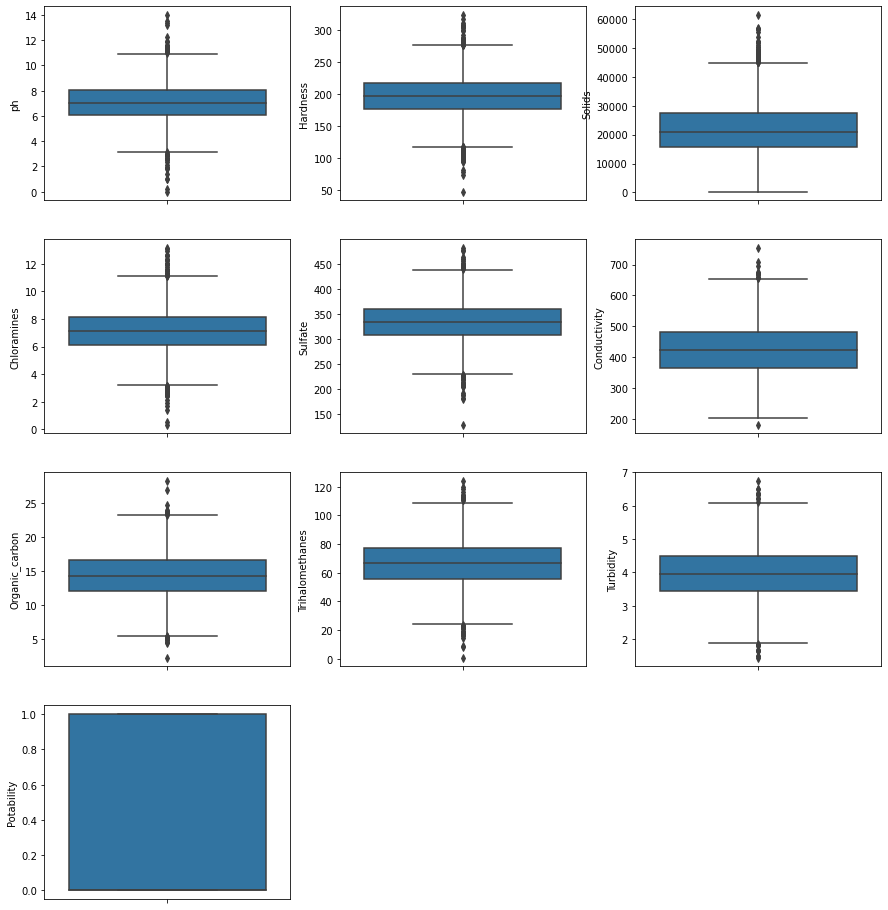

In [85]:
i=1
plt.figure(figsize=(15,25))
for feature in data.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=data[feature])
    i=i+1

We can see the presence of outliers but we will not remove the outliers as our dataset is small and also if we remove the outliers model will not get a chance to train on water elements that are beyond permissable limits.

Filling missing values with median value Because dataset is small we cannot afford to delete those rows and there are outliers present in the data

In [7]:
data.fillna(data.median(),inplace=True)

Checking missing values again 

In [8]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
Percent_missing = data.isnull().sum()*100/len(data)
missing_value_dataframe = pd.DataFrame({'Column_name':data.columns,'Percent_missing':Percent_missing})
missing_value_dataframe


,Column_name,Percent_missing
ph,ph,0.0
Hardness,Hardness,0.0
Solids,Solids,0.0
Chloramines,Chloramines,0.0
Sulfate,Sulfate,0.0
Conductivity,Conductivity,0.0
Organic_carbon,Organic_carbon,0.0
Trihalomethanes,Trihalomethanes,0.0
Turbidity,Turbidity,0.0
Potability,Potability,0.0


# Exploratory Data Analysis

In [10]:
data.shape # Rows,columns

(3276, 10)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.074194,1.470040,0.000000,6.277673,7.036752,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690300,20927.833605,27332.762125,61227.196010
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.608364,36.143851,129.000000,317.094638,333.073546,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792305,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,66.407478,15.769958,0.738000,56.647656,66.622485,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


### Check for correlation between variables

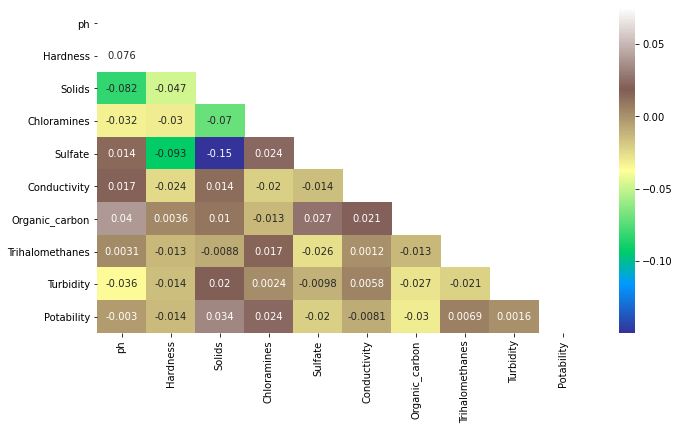

In [12]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(),annot=True,mask = mask,cmap = 'terrain')
fig = plt.gcf()
fig.set_size_inches(11,6)
plt.show()
  

The data shows very less correlation between all the features,also we can not see any trace of multicollinearity,thus we need not do dimensionality reduction.

In [14]:
 data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

### Check for class imbalance

<AxesSubplot:xlabel='Potability', ylabel='count'>

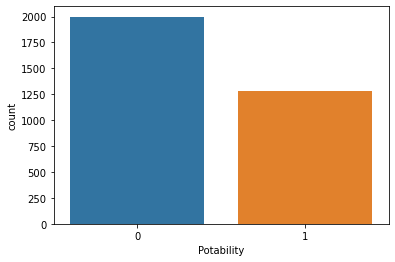

In [15]:
sns.countplot(data['Potability'])

Removing Class imbalance through SMOTE technique

In [16]:
from imblearn.over_sampling import SMOTE 

In [17]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(data.drop(["Potability"],axis=1),data["Potability"])

In [18]:
data  = pd.concat([features,labels],axis=1)

<AxesSubplot:xlabel='Potability', ylabel='count'>

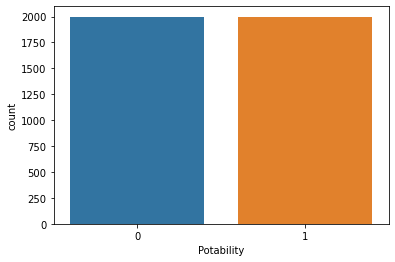

In [19]:
sns.countplot(data['Potability'])

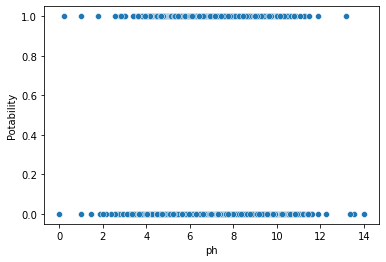

In [20]:
sns.scatterplot(x=data['ph'],y=data['Potability'])
plt.show()

### Check the distribution of variables

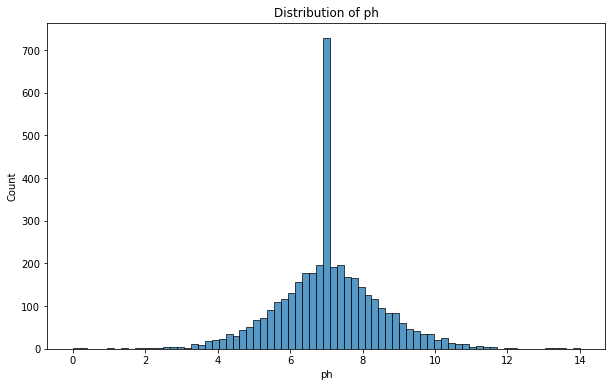

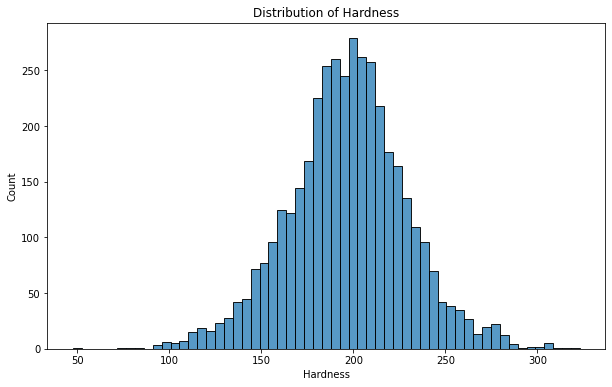

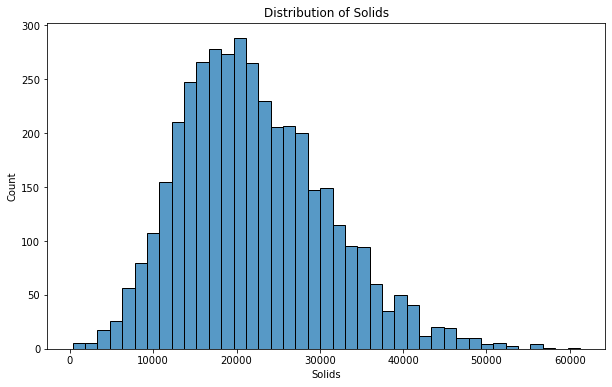

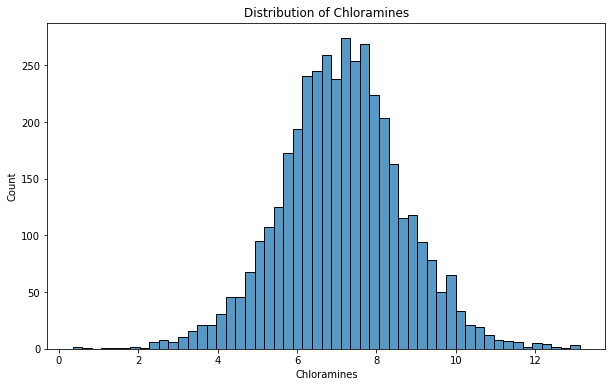

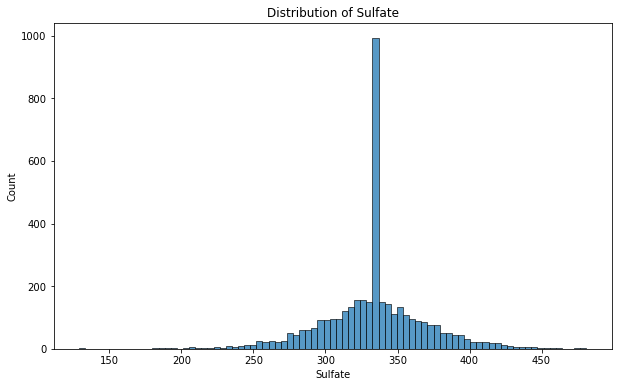

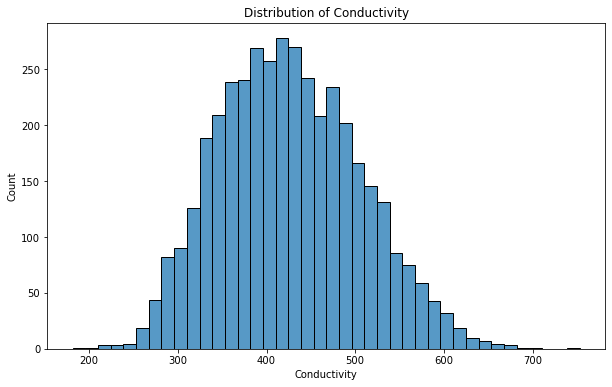

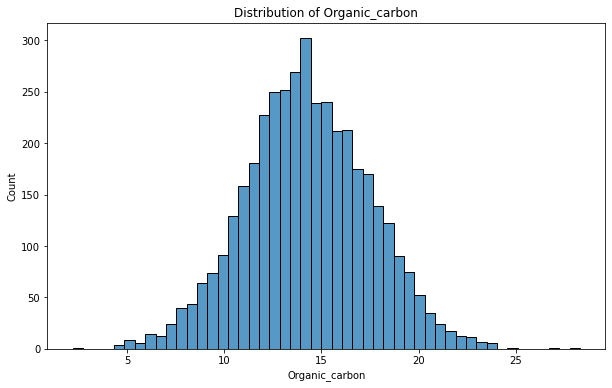

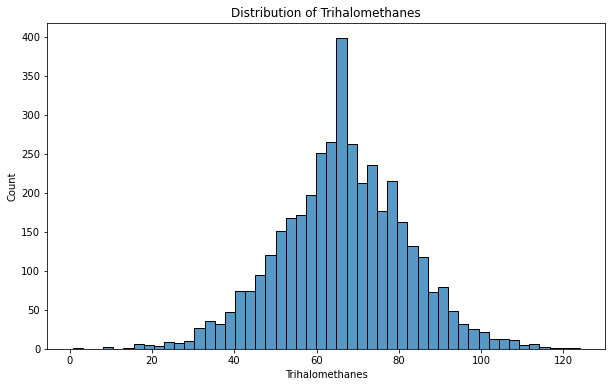

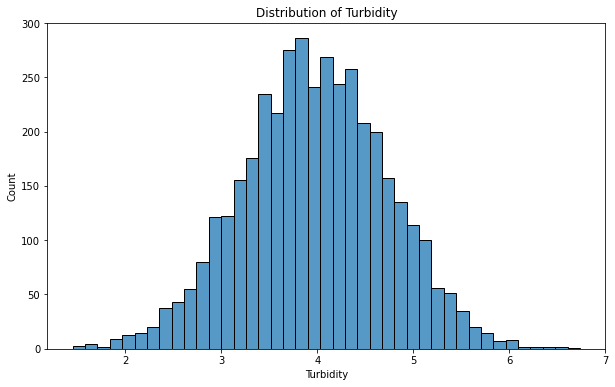

In [21]:
to_plot_var = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
for variable in to_plot_var:
    f, ax = plt.subplots(figsize=(10, 6))
    fig = sns.histplot(x=variable,data=data)
    fig.set_title(f"Distribution of {variable}")
    plt.show()

We can see very high peaks at the middle value for pH, Trihalomethanes, and Sulfate. 
These high peaks are in 'normal' level range considering the informations at the beginning of the project.

### Now, let's see relationships between all variables with hardness and Potability(which is our target variable).

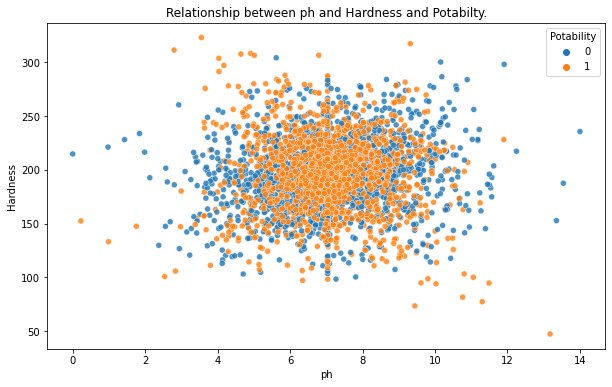

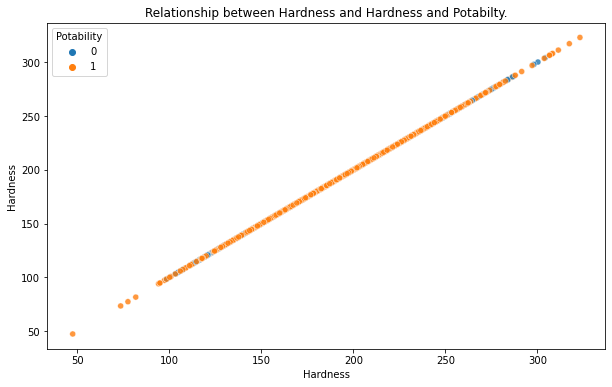

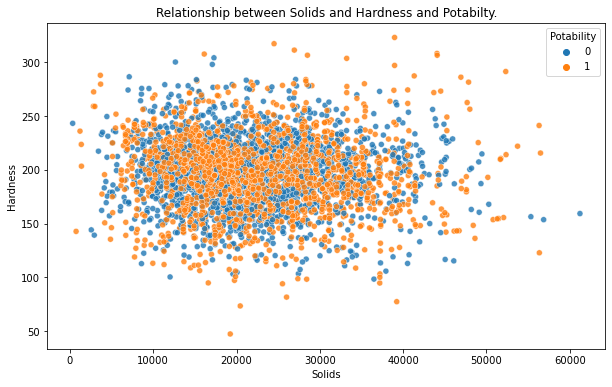

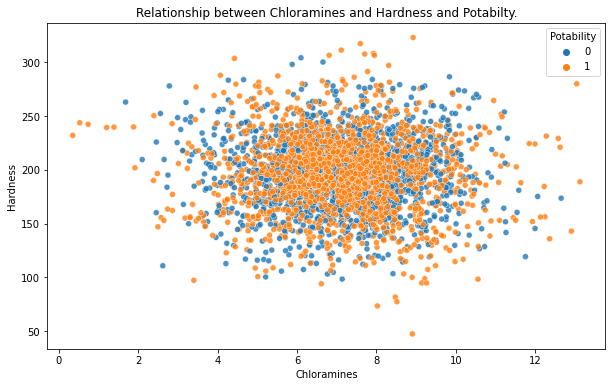

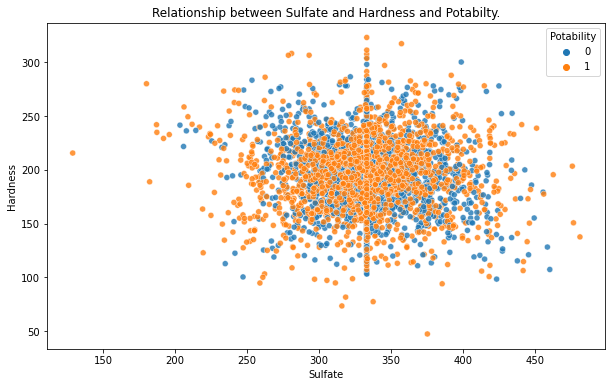

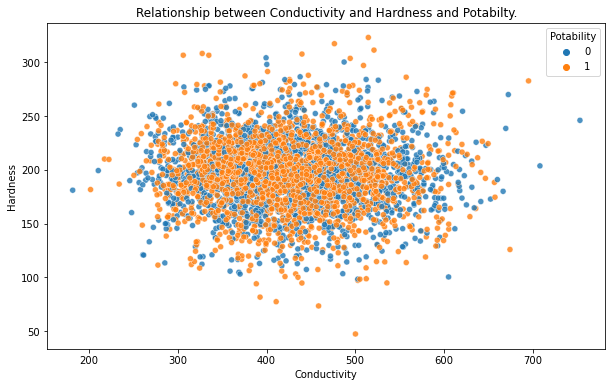

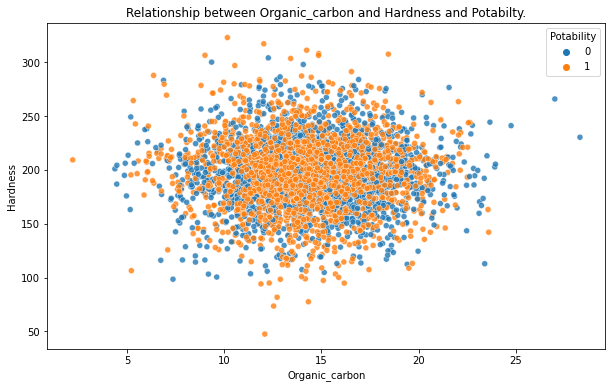

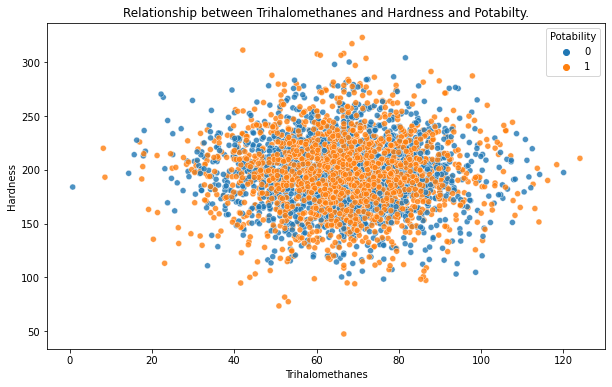

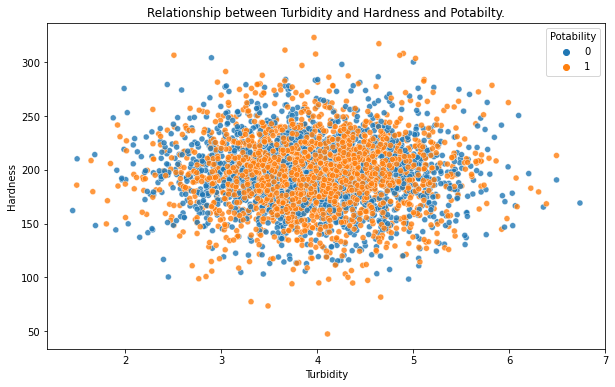

In [22]:
counter = 0
for variable in to_plot_var:
    counter=+1
    f, ax = plt.subplots(figsize=(10, 6))
    fig = sns.scatterplot(x=variable,y=to_plot_var[counter],hue="Potability",data=data,alpha=0.8)
    fig.set_title(f"Relationship between {variable} and {to_plot_var[counter]} and Potabilty.")
    plt.show()

### Now, let's see relationship between each variable with Potability.

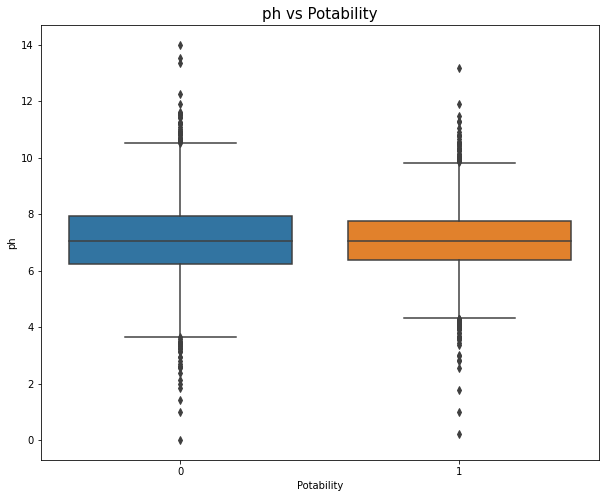

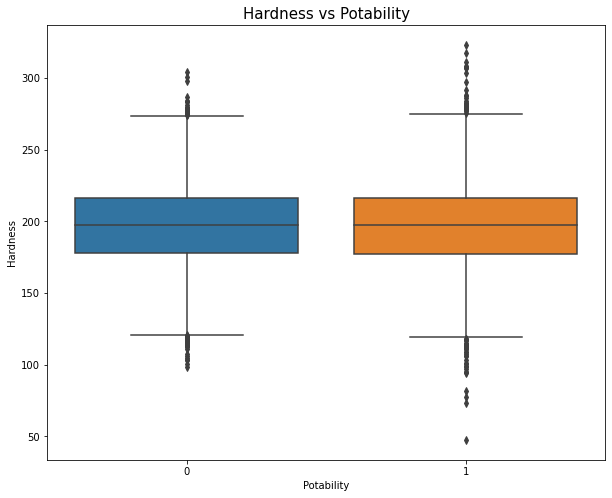

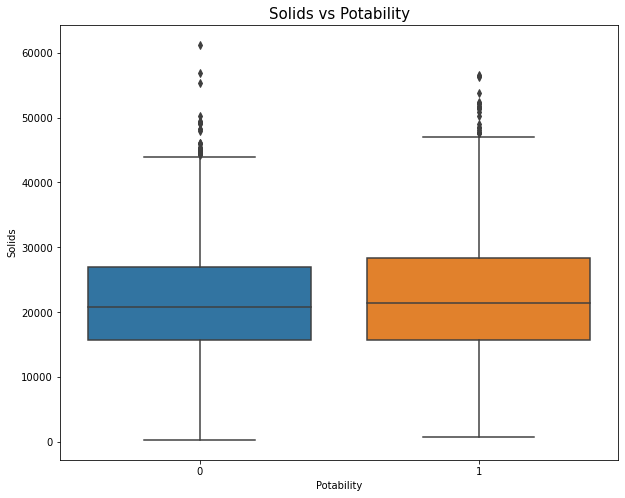

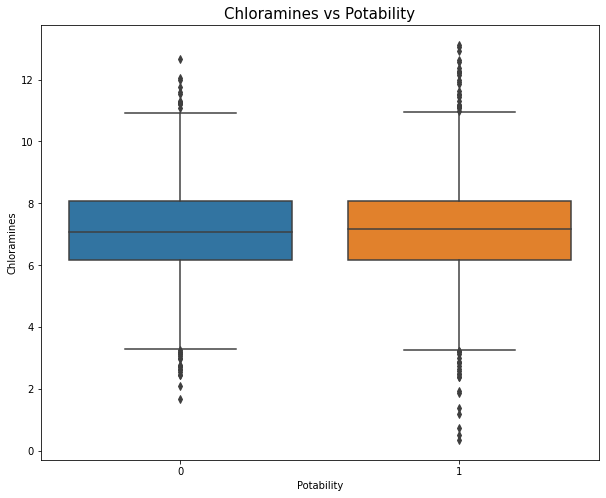

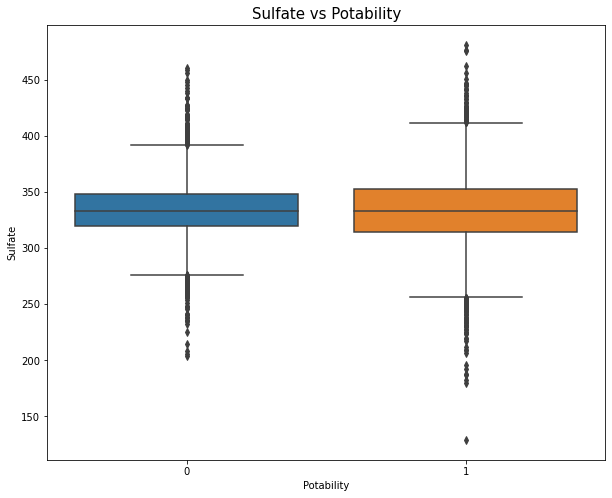

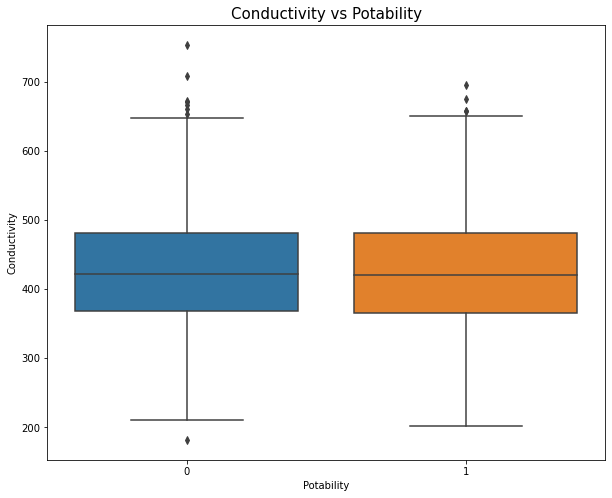

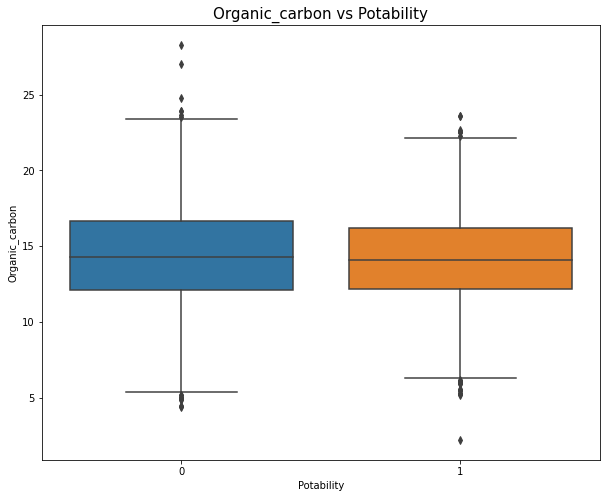

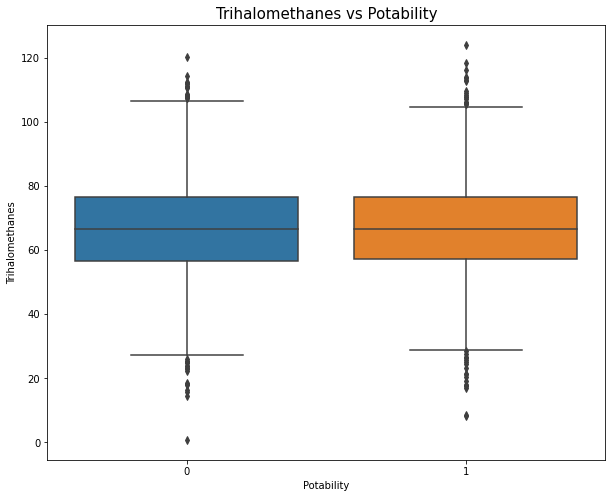

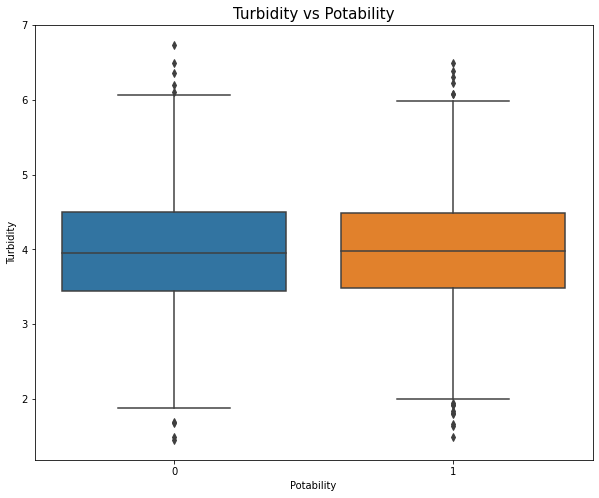

In [23]:
for col in data.drop("Potability", axis=1).columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(data["Potability"], data[col])
    plt.title(f"{col} vs Potability", size=15)
    plt.show()

### Feature Engineering

We'll try to create new features based on various features informations

we know for a fact that ph value of water ranges between 0-14 where in

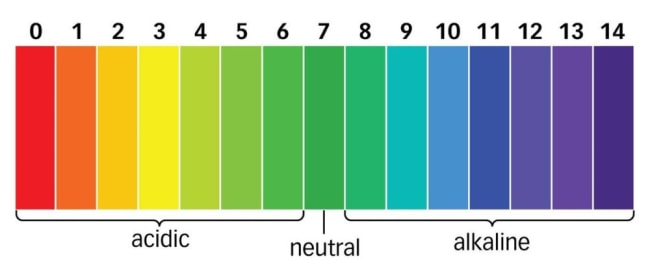

In [24]:
def type_water(x):
    if x < 7:
        return 'Acidic'
    elif (x>=7) & (x<8):
        return 'Neutral'
    else:
        return 'Alkaline'

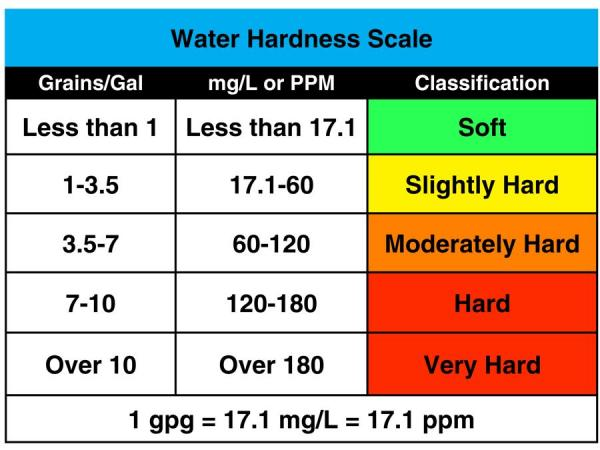

In [25]:
def water_hardness(x):
    if x<17.1:
        return 'Soft'
    elif (x>=17.1) & (x<60):
        return 'Sightly Hard'
    elif (x>=60) & (x<120):
        return 'Moderately Hard'
    elif (x>=120) & (x<180):
        return 'Hard'
    else:
        return 'Very Hard'

In [26]:
data['water_type'] = data['ph'].apply(lambda x : type_water(x))
data['water_hardness'] = data['Hardness'].apply(lambda x : water_hardness(x))

In [27]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,water_type,water_hardness
0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,Neutral,Very Hard
1,3.716080,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0,Acidic,Hard
2,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0,Alkaline,Very Hard
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0,Alkaline,Very Hard
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,Alkaline,Very Hard


In [28]:
type_water_dict = {
    'Acidic' : 0,
    'Neutral' : 1,
    'Alkaline' : 2    }
type_hardness_water = {
    'Very Hard' : 4, 
    'Hard' : 3,
    'Moderately Hard': 2,
    'Sightly Hard': 1,
    'Soft' : 0,}

data['water_type'] = data['water_type'].map(type_water_dict)
data['water_hardness'] = data['water_hardness'].map(type_hardness_water)


In [29]:
X = data.drop('Potability',axis=1) #Input data
y = data['Potability'] #Target variable

### Dummy Encoding

In [30]:
X1 = pd.get_dummies(X , columns = ['water_type' , 'water_hardness'],drop_first=True)
X1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,water_type_1,water_type_2,water_hardness_2,water_hardness_3,water_hardness_4
0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,1,0,0,0,1
1,3.716080,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0,0,0,1,0
2,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0,1,0,0,1
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0,1,0,0,1
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,1,0,0,1


### Standardization

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_sc = sc.fit_transform(X1)
print(X1_sc)

[[-2.53417737e-02  2.58393717e-01 -1.49704855e-01 ... -1.21360160e-01
  -5.98162323e-01  6.20947332e-01]
 [-2.36920343e+00 -2.08317831e+00 -3.95249635e-01 ... -1.21360160e-01
   1.67178701e+00 -1.61044254e+00]
 [ 7.24522462e-01  8.58646438e-01 -2.49885161e-01 ... -1.21360160e-01
  -5.98162323e-01  6.20947332e-01]
 ...
 [ 2.55914649e-01 -1.13817833e+00 -1.19424389e+00 ... -1.21360160e-01
   1.67178701e+00 -1.61044254e+00]
 [-9.39966067e-02  2.82881461e-02 -6.15462294e-01 ... -1.21360160e-01
  -5.98162323e-01  6.20947332e-01]
 [ 4.80857713e-02  3.78383557e-04 -4.03768675e-01 ... -1.21360160e-01
  -5.98162323e-01  6.20947332e-01]]


# Model Building,Testing & Validation

### Splitting the data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X1_sc,y,test_size = 0.3,random_state = 100)

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from matplotlib.colors import ListedColormap

In [36]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model):
    
    
    # predict the output of the target variable from the test data 
    result = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, result))

In [37]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # predict the target values using X_test
    result = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, result)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],\
                               index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

### K Nearest Neighbors (KNN)

#### Building a knn model on a training dataset using euclidean distance.

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

In [39]:
print(get_test_report(knn_model))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       609
           1       0.61      0.67      0.64       590

    accuracy                           0.63      1199
   macro avg       0.63      0.63      0.63      1199
weighted avg       0.63      0.63      0.63      1199



##### Interpretation: The accuracy is 63% for this model.

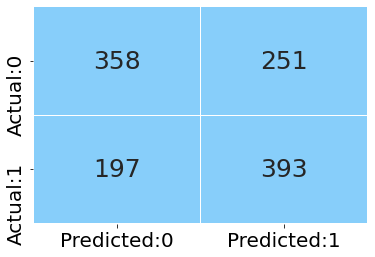

In [40]:
# call the function to plot the confusion matrix
# pass the knn model to the function
plot_confusion_matrix(knn_model)

In [41]:
def kappa_score(model):
    result = model.predict(X_test)
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, result))

In [42]:
kappa_score(knn_model)

0.25358856993577394

##### Interpretation: As the kappa score for the KNN Model is 0.2535, we can say that there is low agreement between the actual and predicted values.

### Optimal Value of K (using GridSearchCV)

In [43]:
from sklearn.model_selection import GridSearchCV
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid = knn_grid.fit(X_train, y_train)
y_pred_knn_grid = knn_grid.predict(X_test)
# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 1} 



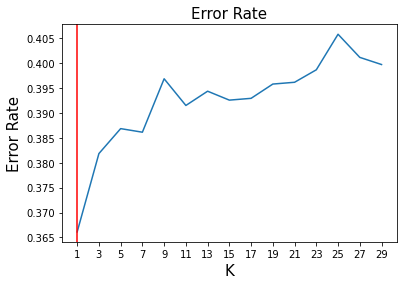

In [44]:
from sklearn.model_selection import cross_val_score 
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,30,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'manhattan')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,30,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 30, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 1, color = 'red')

# display the plot
plt.show()

##### Interpretation: We can see that the optimal value of K (= 1) obtained from the GridSearchCV() results in a lowest error rate.

In [45]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the knn model using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(knn_grid))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.68      0.62      0.65       609
           1       0.64      0.70      0.67       590

    accuracy                           0.66      1199
   macro avg       0.66      0.66      0.66      1199
weighted avg       0.66      0.66      0.66      1199



##### Interpretation: The accuracy is 66% for this model.

In [46]:
kappa_score(knn_grid)

0.31693632205245637

##### Interpretation: As the kappa score for the KNN Model with grid search CV is 0.3137, we can say that there is low agreement between the actual and predicted values. Kappa score has improved slightly.

In [47]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    
    result = model.predict(X_test) 
    fpr, tpr, thresholds = roc_curve(y_test, result)
    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for water quality detection Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, result),4)))

    # plot the grid
    plt.grid(True)

None


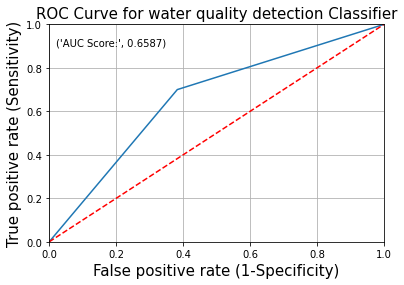

In [48]:
print(plot_roc(knn_grid))

In [49]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
KNN  = pd.Series({'Model': "KNN(grid search CV)",
                     'AUC Score' : metrics.roc_auc_score(y_test,y_pred_knn_grid),
                 'Precision Score': metrics.precision_score(y_test,y_pred_knn_grid),
                 'Recall Score': metrics.recall_score(y_test,y_pred_knn_grid),
                 'Accuracy Score': metrics.accuracy_score(y_test,y_pred_knn_grid),
                  'f1-score':metrics.f1_score(y_test,y_pred_knn_grid)})



# appending our result table
result_tabulation = result_tabulation.append(KNN, ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,KNN(grid search CV),0.658703,0.639319,0.7,0.658048,0.668285


#### The dotted line represents the ROC ; a good classifier stays as far away from that line as far as possible (toward the top-left corner).

#### We see our classifier (KNN) to be away from the dotted line with the AUC score 0.6587.

#### Since model did not perform well to our expectations we will try and build another model ie.Random Forest to check the output.

### Random Forest 

In [50]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators= 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf = clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_RF = clf.predict(X_test)

In [51]:
print(get_test_report(clf))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       609
           1       0.69      0.73      0.71       590

    accuracy                           0.70      1199
   macro avg       0.70      0.70      0.70      1199
weighted avg       0.70      0.70      0.70      1199



##### Interpretation: The accuracy is 70% for this model.

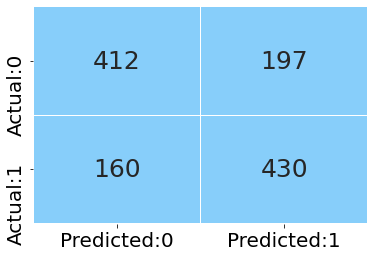

None


In [52]:
# call the function to plot the confusion matrix
# pass the knn model to the function
print(plot_confusion_matrix(clf))

In [53]:
kappa_score(clf)

0.4049363081675409

##### Interpretation: As the kappa score for the KNN Model with grid search CV is 0.4049, we can say that there is fair agreement between the actual and predicted values.though Kappa score has improved when using random forest.

None


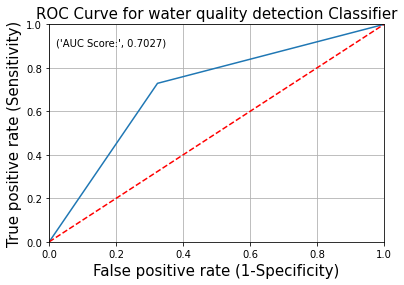

In [54]:
print(plot_roc(clf))

In [55]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
RF_metrics = pd.Series({'Model': "Random Forest",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_RF),
                 'Precision Score': metrics.precision_score(y_test, y_pred_RF),
                 'Recall Score': metrics.recall_score(y_test, y_pred_RF),
                 'Accuracy Score': metrics.accuracy_score(y_test,y_pred_RF),

                  'f1-score':metrics.f1_score(y_test, y_pred_RF)})



# appending our result table
result_tabulation = result_tabulation.append(RF_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,KNN(grid search CV),0.658703,0.639319,0.700000,0.658048,0.668285
1,Random Forest,0.702666,0.685805,0.728814,0.702252,0.706656


##### We see AUC Score has further improved to 0.702666


#### Now we are showing how Random Forest is optimized by cross-validation, which is done using the GridSearchCV() from sklearn library.

### Random Forest with GridSearchCV

In [56]:
# create a dictionary with hyperparameters and its values
# pass the n_estimators 
# pass the list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the list of values to 'max_depth' that assigns maximum depth of the tree
# pass the list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'n_estimators': [ 85,100,300],
                     'min_samples_split': [15,20,25,30],
                     'max_depth': [8,10,15,25]
                     #'min_samples_leaf': [5,10],
                     #'max_leaf_nodes': [10, 15]
                    }]

In [57]:
clf = RandomForestClassifier(random_state=10)

grid = GridSearchCV(estimator = clf, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

dt_grid = grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', dt_grid.best_params_, '\n')

Best parameters for random forest classifier:  {'max_depth': 25, 'min_samples_split': 20, 'n_estimators': 300} 



In [58]:
#instantiate the 'RandomForestClassifier'
#'best_params_' returns the dictionary containing best parameter values and parameter name  
#'get()' returns the value of specified parameter
#pass the 'random_state' to obtain the same samples for each time you run the code
dt_grid_model = RandomForestClassifier(n_estimators = dt_grid.best_params_.get('n_estimators'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       #max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       #min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(X_train, y_train)

In [59]:
# predict the class labels using 'X_test'
y_pred = dt_grid_model.predict(X_test)

In [60]:
print(get_test_report(dt_grid_model))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67       609
           1       0.66      0.69      0.67       590

    accuracy                           0.67      1199
   macro avg       0.67      0.67      0.67      1199
weighted avg       0.67      0.67      0.67      1199



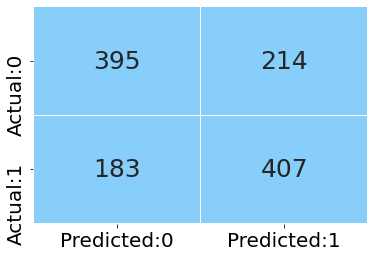

None


In [61]:
print(plot_confusion_matrix(dt_grid_model))

In [62]:
print(kappa_score(dt_grid_model))

0.3381576148240637


None


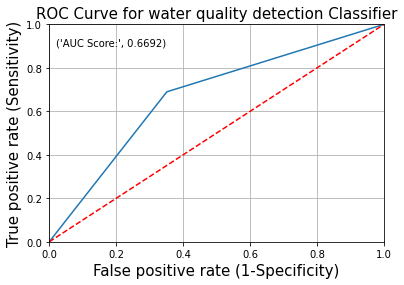

In [63]:
print(plot_roc(dt_grid_model))

#### We see that using random forest with grid search cv doesnot impact accuracy and other evaluation parameters of the model ie. there is no significant difference that is why it is meaningless to do hyperparameter tuning with randomforest it is better to keep default parameters.

### Hence, we will now evaluate our model on some ensemble techniques, ie. using XGBOOST

### XGBOOST

#### Now we build a Ensemble learning model using XGB(extreme Gradient Boosting). We start with our original data set gradually proceeding with our analysis

#### In order to build a model using XGBM, we do the following:
#### 1. Build the model
#### 2. Predict the values
#### 3. Compute the accuracy measures
#### 4. Tabulate the results

In [64]:
#import xgboost classifier
from xgboost.sklearn import XGBClassifier

# build the model
xgbm = XGBClassifier(random_state=1,learning_rate=0.01)
# fit the model
XGBM_model = xgbm.fit(X_train, y_train)

[23:00:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [65]:
# predict the values
y_pred_xgbm  = XGBM_model.predict(X_test)

In [66]:
print(get_test_report(XGBM_model))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61       609
           1       0.60      0.66      0.63       590

    accuracy                           0.62      1199
   macro avg       0.62      0.62      0.62      1199
weighted avg       0.62      0.62      0.62      1199



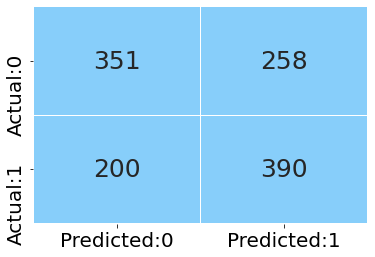

None


In [67]:
print(plot_confusion_matrix(XGBM_model))

In [68]:
print(kappa_score(XGBM_model))

0.2370081781576775


None


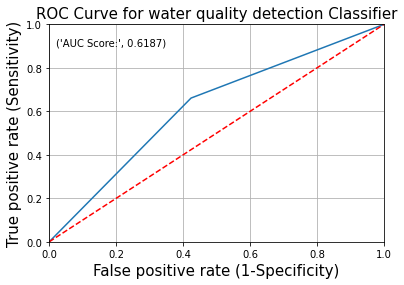

In [69]:
print(plot_roc(XGBM_model))

In [70]:
import sklearn.metrics

In [71]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
xgbm_metrices = pd.Series({'Model': "XGBM",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_xgbm),
                 'Precision Score': metrics.precision_score(y_test, y_pred_xgbm),
                 'Recall Score': metrics.recall_score(y_test, y_pred_xgbm),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_xgbm),

                  'f1-score':metrics.f1_score(y_test, y_pred_xgbm)})



# appending our result table
result_tabulation = result_tabulation.append(xgbm_metrices , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,KNN(grid search CV),0.658703,0.639319,0.700000,0.658048,0.668285
1,Random Forest,0.702666,0.685805,0.728814,0.702252,0.706656
2,XGBM,0.618686,0.601852,0.661017,0.618015,0.630048


## Conclusion 

### We conclude that out of the best three models Random Forest model with default parameters outshine in terms of AUC Score,Accuracy Score, Recall Score,Precision Score, and F1 Score ie. all model evaluation parameters thus we select Random Forest as the best performing model.

### Also, after performing all the model evaluation techniques we can also conclude that independent features are not supporting the dependent feature for the model to improve on and grow accuracy significantly.  